# Pair Trading With Cryptocurrencies

## How To Scrape Cryptocurrencies Historical Data Using Python

## Introduction
...

## CoinMarketCap
Website is here https://coinmarketcap.com.

Import packages

In [1]:
from requests import get

In [2]:
from bs4 import BeautifulSoup

In [3]:
import pandas as pd

In [4]:
from pandas import DataFrame

In [5]:
import matplotlib.pyplot as plt

In [6]:
import pickle

In [7]:
%matplotlib inline

## Scrape Cryptocurrencies OHLCV

Set cryptocurrencies we want to collect OHLCV

In [8]:
id = ['BTC', 'ETH', 'XRP', 'LTC']

Their corresponding URLs

In [9]:
url = {'BTC': 'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20190521',
       'ETH': 'https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end=20190521',
       'XRP': 'https://coinmarketcap.com/currencies/ripple/historical-data/?start=20130428&end=20190521',
       'LTC': 'https://coinmarketcap.com/currencies/litecoin/historical-data/?start=20130428&end=20190525'}

For Volume and Market Cap:
- There are str and float in the Series; and
- We use function my_convert

In [10]:
def my_convert(string):
    res = 0.0
    
    if string == 'NaN':
        res = string
    elif string == '-':
        res = 0.0
    elif type(string) == str:
        res = string.replace(',', '')
        res = float(res)
    else:
        pass
    
    return res

Scrape

In [11]:
# Create a list for concat
data_list = []

for i in id:
    
    # Retrieve data from URL
    response = get(url[i])
    
    # Create soup
    html_soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find OHLCV table
    ohlcv_table = html_soup.find_all('tr', class_='text-right')
    
    # Store in a dictionary
    data = {}
    for j in range(len(ohlcv_table)):
        ohlcv_row = ohlcv_table[j].text.split('\n')
        data[ohlcv_row[1]] = [float(ohlcv_row[2]), # Open
                              float(ohlcv_row[3]), # High
                              float(ohlcv_row[4]), # Low
                              float(ohlcv_row[5]), # Close
                              my_convert(ohlcv_row[6]), # Volume
                              my_convert(ohlcv_row[7])] # Market cap
        
    # Store in a DataFrame
    data_df = pd.DataFrame.from_dict(data, orient='index')
        
    # Rename columns
    data_df.columns = pd.MultiIndex.from_product([[i], ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']])
    
    # Convert index to DateTimeIndex
    data_df.index = pd.to_datetime(data_df.index)
    
    # Append to list
    data_list.append(data_df)
    
# Create DataFrame containing all the cryptos
crypto = pd.concat(data_list, axis=1)  

Check

In [12]:
crypto.head()

BTC                                               ETH           \
              Open    High     Low   Close Volume    Market Cap Open High Low   
2013-04-28  135.30  135.98  132.10  134.21    0.0  1.488567e+09  NaN  NaN NaN   
2013-04-29  134.44  147.49  134.00  144.54    0.0  1.603769e+09  NaN  NaN NaN   
2013-04-30  144.00  146.93  134.05  139.00    0.0  1.542813e+09  NaN  NaN NaN   
2013-05-01  139.00  139.89  107.72  116.99    0.0  1.298955e+09  NaN  NaN NaN   
2013-05-02  116.38  125.60   92.28  105.21    0.0  1.168517e+09  NaN  NaN NaN   

                     ...     XRP                           LTC              \
           Close     ...     Low Close Volume Market Cap  Open  High   Low   
2013-04-28   NaN     ...     NaN   NaN    NaN        NaN  4.30  4.40  4.18   
2013-04-29   NaN     ...     NaN   NaN    NaN        NaN  4.37  4.57  4.23   
2013-04-30   NaN     ...     NaN   NaN    NaN        NaN  4.40  4.57  4.17   
2013-05-01   NaN     ...     NaN   NaN    NaN        NaN  4.29  4.36  3.52   
2013-05-02   NaN     ...     NaN   NaN    NaN        NaN  3.78  4.04  3.01   

                                     
           Close Volume  Market Cap  
2013-04-28  4.35    0.0  74636938.0  
2013-04-29  4.38    0.0  75388964.0  
2013-04-30  4.30    0.0  74020918.0  
2013-05-01  3.80    0.0  65604596.0  
2013-05-02  3.37    0.0  58287979.0  

[5 rows x 24 columns]

In [13]:
crypto.tail()

BTC                                                         \
               Open     High      Low    Close        Volume    Market Cap   
2019-05-20  8196.92  8200.97  7678.78  7978.31  2.384340e+10  1.413157e+11   
2019-05-21  7977.97  8062.17  7843.34  7963.33  2.512725e+10  1.410656e+11   
2019-05-22      NaN      NaN      NaN      NaN           NaN           NaN   
2019-05-23      NaN      NaN      NaN      NaN           NaN           NaN   
2019-05-24      NaN      NaN      NaN      NaN           NaN           NaN   

               ETH                             ...            XRP            \
              Open    High    Low   Close      ...            Low     Close   
2019-05-20  261.27  261.55  241.8  251.86      ...       0.384647  0.398003   
2019-05-21  251.65  262.11  248.2  255.22      ...       0.389302  0.397603   
2019-05-22     NaN     NaN    NaN     NaN      ...            NaN       NaN   
2019-05-23     NaN     NaN    NaN     NaN      ...            NaN       NaN   
2019-05-24     NaN     NaN    NaN     NaN      ...            NaN       NaN   

                                          LTC                        \
                  Volume    Market Cap   Open    High    Low  Close   
2019-05-20  2.258367e+09  1.676255e+10  95.34   95.34  88.57  91.49   
2019-05-21  1.811582e+09  1.674573e+10  91.57   92.44  89.59  91.51   
2019-05-22           NaN           NaN  91.51   92.00  87.55  88.21   
2019-05-23           NaN           NaN  88.20   89.74  85.23  89.18   
2019-05-24           NaN           NaN  88.97  102.75  88.32  99.90   

                                        
                  Volume    Market Cap  
2019-05-20  3.566921e+09  5.659973e+09  
2019-05-21  3.145769e+09  5.662154e+09  
2019-05-22  3.398528e+09  5.459427e+09  
2019-05-23  3.208807e+09  5.520439e+09  
2019-05-24  5.393658e+09  6.185976e+09  

[5 rows x 24 columns]

In [14]:
crypto.describe()

BTC                                                          \
               Open          High           Low         Close        Volume   
count   2215.000000   2215.000000   2215.000000   2215.000000  2.215000e+03   
mean    2448.287847   2519.727716   2370.888108   2451.666005  2.128978e+09   
std     3362.405583   3483.766589   3217.624264   3363.891547  4.122712e+09   
min       68.500000     74.560000     65.530000     68.430000  0.000000e+00   
25%      349.320000    358.255000    342.475000    349.900000  2.002465e+07   
50%      630.830000    643.950000    619.910000    631.110000  6.851110e+07   
75%     3903.570000   3969.715000   3836.905000   3906.335000  3.258895e+09   
max    19475.800000  20089.000000  18974.100000  19497.400000  3.316720e+10   

                             ETH                                         \
         Market Cap         Open         High          Low        Close   
count  2.215000e+03  1384.000000  1384.000000  1384.000000  1384.000000   
mean   4.092496e+10   204.304370   212.201092   195.395917   204.419357   
std    5.746046e+10   261.618783   273.080633   247.945252   261.440400   
min    7.784112e+08     0.431589     0.482988     0.420897     0.434829   
25%    4.807292e+09    10.707500    11.010000    10.297500    10.722500   
50%    9.288723e+09   116.940000   119.690000   114.045000   116.830000   
75%    6.784261e+10   298.472500   307.390000   290.800000   298.470000   
max    3.265025e+11  1397.480000  1432.880000  1290.600000  1396.420000   

           ...               XRP                                           \
           ...               Low        Close        Volume    Market Cap   
count      ...       2117.000000  2117.000000  2.117000e+03  2.117000e+03   
mean       ...          0.167095     0.176969  2.543332e+08  6.884980e+09   
std        ...          0.305731     0.331741  7.181410e+08  1.298697e+10   
min        ...          0.002802     0.002810  0.000000e+00  2.196991e+07   
25%        ...          0.006276     0.006399  3.051700e+05  1.943039e+08   
50%        ...          0.009642     0.010140  1.123560e+06  2.741146e+08   
75%        ...          0.277185     0.289678  2.355140e+08  1.140139e+10   
max        ...          3.120000     3.380000  9.110440e+09  1.308535e+11   

               LTC                                                       \
              Open         High          Low        Close        Volume   
count  2218.000000  2218.000000  2218.000000  2218.000000  2.218000e+03   
mean     32.840600    34.294306    31.279229    32.872976  2.640423e+08   
std      52.735835    55.532640    49.627420    52.720152  6.646704e+08   
min       1.150000     1.340000     1.110000     1.160000  0.000000e+00   
25%       3.390000     3.462500     3.300000     3.390000  1.668308e+06   
50%       4.795000     4.965000     4.645000     4.810000  4.379115e+06   
75%      46.695000    49.035000    45.120000    46.805000  2.776928e+08   
max     359.130000   375.290000   335.670000   358.340000  6.961680e+09   

                     
         Market Cap  
count  2.218000e+03  
mean   1.761528e+09  
std    2.962924e+09  
min    3.789242e+07  
25%    1.360768e+08  
50%    2.051210e+08  
75%    2.555137e+09  
max    1.948262e+10  

[8 rows x 24 columns]

Plot

In [15]:
id

['BTC', 'ETH', 'XRP', 'LTC']

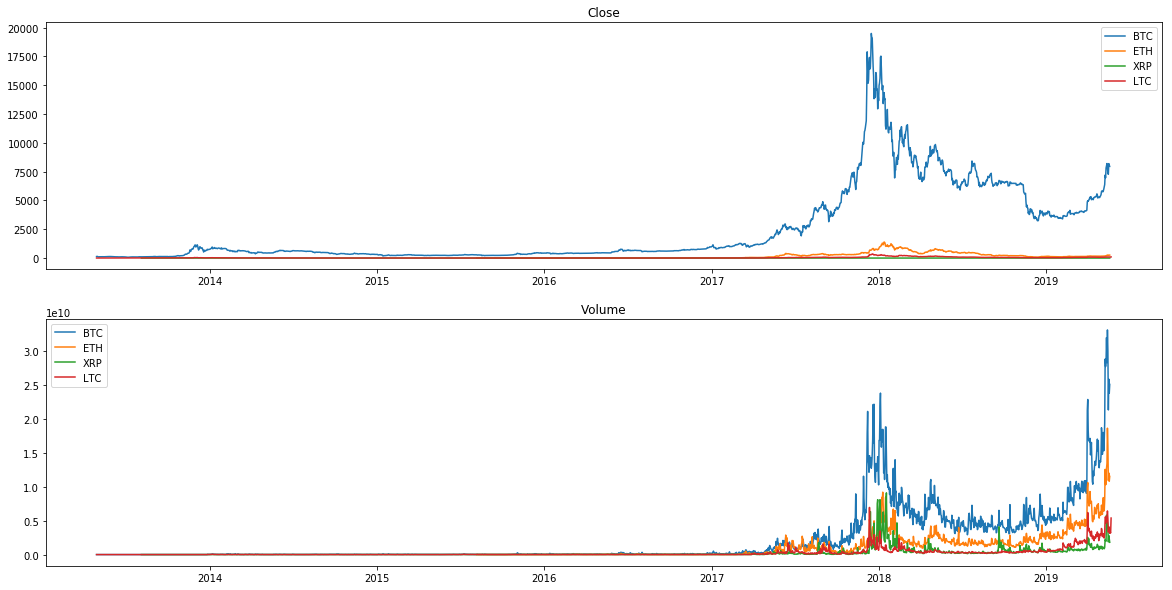

In [18]:
# Adjust plot size
plt.figure(figsize=[20, 10])

# Close
plt.subplot(2, 1, 1)
plt.plot(crypto.BTC.Close)
plt.plot(crypto.ETH.Close)
plt.plot(crypto.XRP.Close)
plt.plot(crypto.LTC.Close)
plt.title('Close')
plt.legend(id)

# Volume
plt.subplot(2, 1, 2)
plt.plot(crypto.BTC.Volume)
plt.plot(crypto.ETH.Volume)
plt.plot(crypto.XRP.Volume)
plt.plot(crypto.LTC.Volume)
plt.title('Volume')
plt.legend(id)

## Save To File

In [17]:
with open('data_coinmarketcap.pickle', 'wb') as f:
    pickle.dump(crypto, f)
    
f.close()

## Conclusion
...